
# Exploratory data analysis


## Table of contents

0. [Introduction](#Introduction)
1. [Import of packages](#Packages)
2. [Import of functions](#Functions)
3. [Import of data](#Data)
    1. [Adjusting the dataframe to enhance analyses](#Adjusting)
        1. [Category](#CategoryAdjusting)
        2. [Duplicates](#DuplicatesAdjusting)
        3. [Missing](#MissingAdjusting)
    2. [Spliting the dataframe](#Spliting)
4. [Results](#EDAResults)
    1. [Initial informations ](#InitialResults)
    2. [Overview](#OverviewResults)
    3. [Categorical Variables distributions](#CategoricalDistributionsResults)
    4. [Numeric Variables distributions](#NumericDistributionsResults)
    5. [Target proportion](#ProportionResults)


<section id="Introduction">
    <h2> 0. Introduction </h2>
</section>


This is a file with functions that aim to facilitate exploratory data analysis. As output, the functions provide graphs, metrics, and basic tables commonly used in the analysis process. Pay attention to the function parameters:

- **df_origin**: single pandas dataframe;

<br>

- **X_train**: pandas train dataframe;
- **X_test**: pandas test dataframe;
- **X_validation**: pandas validation dataframe;

<br>

- **y_train**: train target;
- **y_test**: test target;
- **y_validation**: validation target;


---



<section id="Packages">
    <h2> 1. Import of packages </h2>
</section>


In [8]:
#!pip install

In [9]:
from sklearn.datasets import load_breast_cancer

from fast_ml import eda
from fast_ml.model_development import train_valid_test_split
from fast_ml.utilities import reduce_memory_usage, display_all

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle # pickle
import pyarrow

# interative interface
import ipywidgets as widgets
from IPython.display import display


<section id="Functions">
    <h2> 2. Import of Functions </h2>
</section>


In [11]:
import os
print(os.getcwd())

/home/744ef240-a25d-4872-a66e-1d945ea1adf7/model_analysis/jupyter_notebooks/EDA


In [86]:
%run "/home/744ef240-a25d-4872-a66e-1d945ea1adf7/model_analysis/jupyter_notebooks/EDA/model_analysis-eda-functions.ipynb"


<section id="Data">
    <h2> 3. Import of data </h2>
</section>


In [14]:
X_origin, y_origin = load_breast_cancer(return_X_y=True, as_frame=True)

In [15]:
y_dataframe = pd.DataFrame(y_origin, columns=['target'])

In [16]:
df_origin = pd.concat([X_origin, y_dataframe], axis=1)

In [17]:
df_origin

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0



<section id="Adjusting">
    <h3> 3.1. Adjusting the dataframe to enhance analyses </h3>
</section>



<section id="CategoryAdjusting">
    <h4> 3.1.1. Category </h4>
</section>


In [20]:
categories = ['A', 'B', 'C']

df_origin['false category'] = np.random.choice(categories, size=len(df_origin))
df_origin['false category2'] = np.random.choice(categories, size=len(df_origin))
df_origin['false category3'] = np.random.choice(categories, size=len(df_origin))

In [21]:
df_origin

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target,false category,false category2,false category3
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0,B,B,A
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0,B,A,B
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0,C,A,A
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0,C,A,C
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0,A,A,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0,C,A,B
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0,A,C,C
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0,A,B,A
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0,B,B,C



<section id="MissingAdjusting">
    <h4> 3.1.2. Missing </h4>
</section>


In [23]:
num_rows, num_columns = df_origin.shape
missing_percent = 0.11
missing_num = int(num_rows * num_columns * missing_percent)

affected_rows = np.random.randint(0, num_rows, missing_num)
affected_columns = np.random.randint(0, num_columns, missing_num)

for row, column in zip(affected_rows, affected_columns):
    df_origin.iat[row, column] = np.nan


In [24]:
df_origin_missing = df_origin[df_origin['target'].notna()]

In [25]:
df_origin_missing

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target,false category,false category2,false category3
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0.0,NaN,B,A
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0.0,B,NaN,B
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,NaN,0.12790,0.2069,0.05999,...,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0.0,C,A,A
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0.0,C,A,NaN
4,20.29,14.34,NaN,1297.0,0.10030,0.13280,0.19800,0.10430,NaN,0.05883,...,0.13740,0.20500,0.4000,NaN,0.2364,0.07678,0.0,A,A,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0.0,C,A,B
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0.0,A,C,C
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0.0,A,B,NaN
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0.0,B,B,C



<section id="DuplicatesAdjusting">
    <h4> 3.1.3. Duplicates </h4>
</section>


In [27]:
num_duplicates = 555

random_index = np.random.choice(df_origin_missing.index, num_duplicates, replace=True)

duplicates = df_origin_missing.loc[random_index]

df_origin_missing_duplicate = pd.concat([df_origin_missing, duplicates])

df_origin_missing_duplicate.reset_index(drop=True, inplace=True)

In [28]:
df_origin_missing_duplicate

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target,false category,false category2,false category3
0,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.147100,0.2419,0.07871,...,0.16220,0.66560,0.71190,0.26540,0.4601,0.11890,0.0,NaN,B,A
1,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.070170,0.1812,0.05667,...,0.12380,0.18660,0.24160,0.18600,0.2750,0.08902,0.0,B,NaN,B
2,19.690,21.25,130.00,1203.0,0.10960,0.15990,NaN,0.127900,0.2069,0.05999,...,0.14440,0.42450,0.45040,0.24300,0.3613,0.08758,0.0,C,A,A
3,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.105200,0.2597,0.09744,...,0.20980,0.86630,0.68690,0.25750,0.6638,0.17300,0.0,C,A,NaN
4,20.290,14.34,NaN,1297.0,0.10030,0.13280,0.198000,0.104300,NaN,0.05883,...,0.13740,0.20500,0.40000,NaN,0.2364,0.07678,0.0,A,A,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,14.800,NaN,NaN,674.8,0.09179,0.08890,0.040690,0.022600,0.1893,0.05886,...,0.12260,0.18810,0.20600,0.08308,0.3600,0.07285,1.0,A,B,A
1063,NaN,18.90,76.66,NaN,NaN,0.05794,0.007510,0.008488,0.1555,NaN,...,0.12890,0.13520,NaN,0.05093,0.2880,0.08083,1.0,NaN,NaN,NaN
1064,11.080,18.83,73.30,361.6,0.12160,0.21540,0.168900,0.063670,0.2196,0.07950,...,0.21840,0.93790,0.84020,0.25240,0.4154,0.14030,0.0,B,A,A
1065,11.660,17.07,73.70,421.0,0.07561,0.03630,0.008306,0.011620,0.1671,0.05731,...,0.09958,0.06476,0.03046,0.04262,0.2731,NaN,1.0,NaN,C,C



<section id="Spliting">
    <h3> 3.2. Spliting the dataframe </h3>
</section>


In [30]:
X_train, y_train, X_validation, y_validation, X_test, y_test = train_valid_test_split(
                                                        df_origin_missing_duplicate,
                                                        target = 'target',
                                                        train_size=0.8,
                                                        valid_size=0.1,
                                                        test_size=0.1)


---



<section id="EDAResults">
    <h2> 4. Results </h2>
</section>


Note that the `df_origin` has more columns than `X_<>`, which corresponds to the target variable.

In [34]:
df_origin.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target,false category,false category2,false category3
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0,NaN,B,A
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0,B,NaN,B
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,NaN,0.12790,0.2069,0.05999,...,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0,C,A,A
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0,C,A,NaN
4,20.29,14.34,NaN,1297.0,0.10030,0.13280,0.1980,0.10430,NaN,0.05883,...,0.1374,0.2050,0.4000,NaN,0.2364,0.07678,0.0,A,A,B


In [35]:
df_origin.tail(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target,false category,false category2,false category3
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0.0,C,A,B
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0.0,A,C,C
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0.0,A,B,NaN
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0.0,B,B,C
568,7.76,24.54,47.92,181.0,0.05263,0.04362,NaN,0.00000,0.1587,0.05884,...,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1.0,A,NaN,B


In [36]:
df_origin.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,520.000000,515.000000,507.000000,510.000000,522.000000,503.000000,525.000000,502.000000,520.000000,509.000000,...,504.000000,519.000000,504.000000,500.000000,502.000000,511.000000,499.000000,511.000000,520.000000,512.000000
mean,14.134390,19.288524,92.152189,662.969216,0.096493,0.105944,0.087290,0.048417,0.181202,0.062689,...,25.743790,108.128998,890.713492,0.132375,0.256350,0.274688,0.114969,0.290072,0.084282,0.630859
std,3.527862,4.289226,24.218940,357.467538,0.014192,0.053559,0.078082,0.038753,0.027685,0.007011,...,6.263951,33.739866,583.229625,0.022922,0.161382,0.211743,0.065877,0.062262,0.018306,0.483044
min,6.981000,10.380000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.667500,16.170000,75.100000,421.475000,0.086635,0.066160,0.029560,0.020103,0.161975,0.057640,...,21.095000,84.480000,516.475000,0.116600,0.147325,0.116750,0.064985,0.250300,0.071468,0.000000
50%,13.435000,18.890000,86.490000,557.650000,0.096425,0.095090,0.060150,0.033455,0.178400,0.061320,...,25.470000,98.270000,687.100000,0.131400,0.211450,0.228200,0.098610,0.282200,0.080420,1.000000
75%,15.892500,21.805000,104.900000,790.575000,0.105400,0.130800,0.122600,0.072710,0.195975,0.066120,...,29.965000,127.100000,1096.750000,0.146000,0.341600,0.385700,0.164800,0.317150,0.092095,1.000000
max,27.420000,39.280000,186.900000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.290300,0.663800,0.207500,1.000000



<section id="InitialResults">
    <h3> 4.1. Initial informations </h3>
</section>


In [38]:
eda_initial_informations(df_origin)

Number of rows: 569
Number of columns: 34
Index: RangeIndex(start=0, stop=569, step=1)



<section id="OverviewResults">
    <h3> 4.2. Overview </h3>
</section>


In [40]:
eda_summary_table(df_origin)

,Variable Order,Number of total occurrences,Number of no missing occurreces,Number of missing,Percent of missing (%),Number of unique no missing occurrences,Format,Type
mean radius,1,569,520,49,9,431,float64,Numeric
mean texture,2,569,515,54,9,440,float64,Numeric
mean perimeter,3,569,507,62,11,469,float64,Numeric
mean area,4,569,510,59,10,485,float64,Numeric
mean smoothness,5,569,522,47,8,441,float64,Numeric
mean compactness,6,569,503,66,12,477,float64,Numeric
mean concavity,7,569,525,44,8,501,float64,Numeric
mean concave points,8,569,502,67,12,478,float64,Numeric
mean symmetry,9,569,520,49,9,399,float64,Numeric
mean fractal dimension,10,569,509,60,11,452,float64,Numeric



<section id="CategoricalDistributionsResults">
    <h3> 4.3. Categorical Variables Distributions </h3>
</section>


In [205]:
%run "/home/744ef240-a25d-4872-a66e-1d945ea1adf7/model_analysis/jupyter_notebooks/EDA/model_analysis-eda-functions.ipynb"

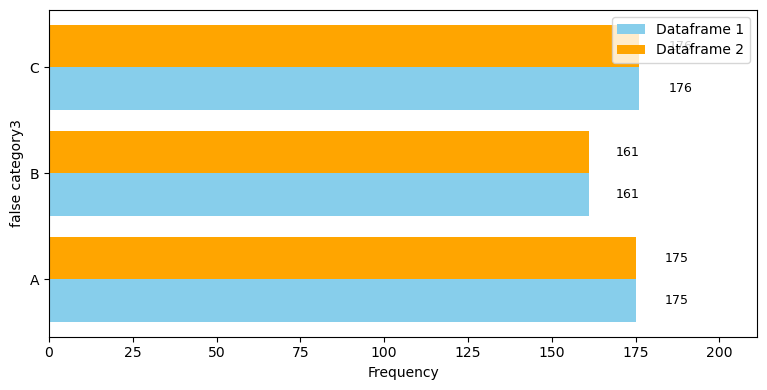

In [178]:
eda_categorical_variables_distributions(df_origin, df_origin, 33, 34)

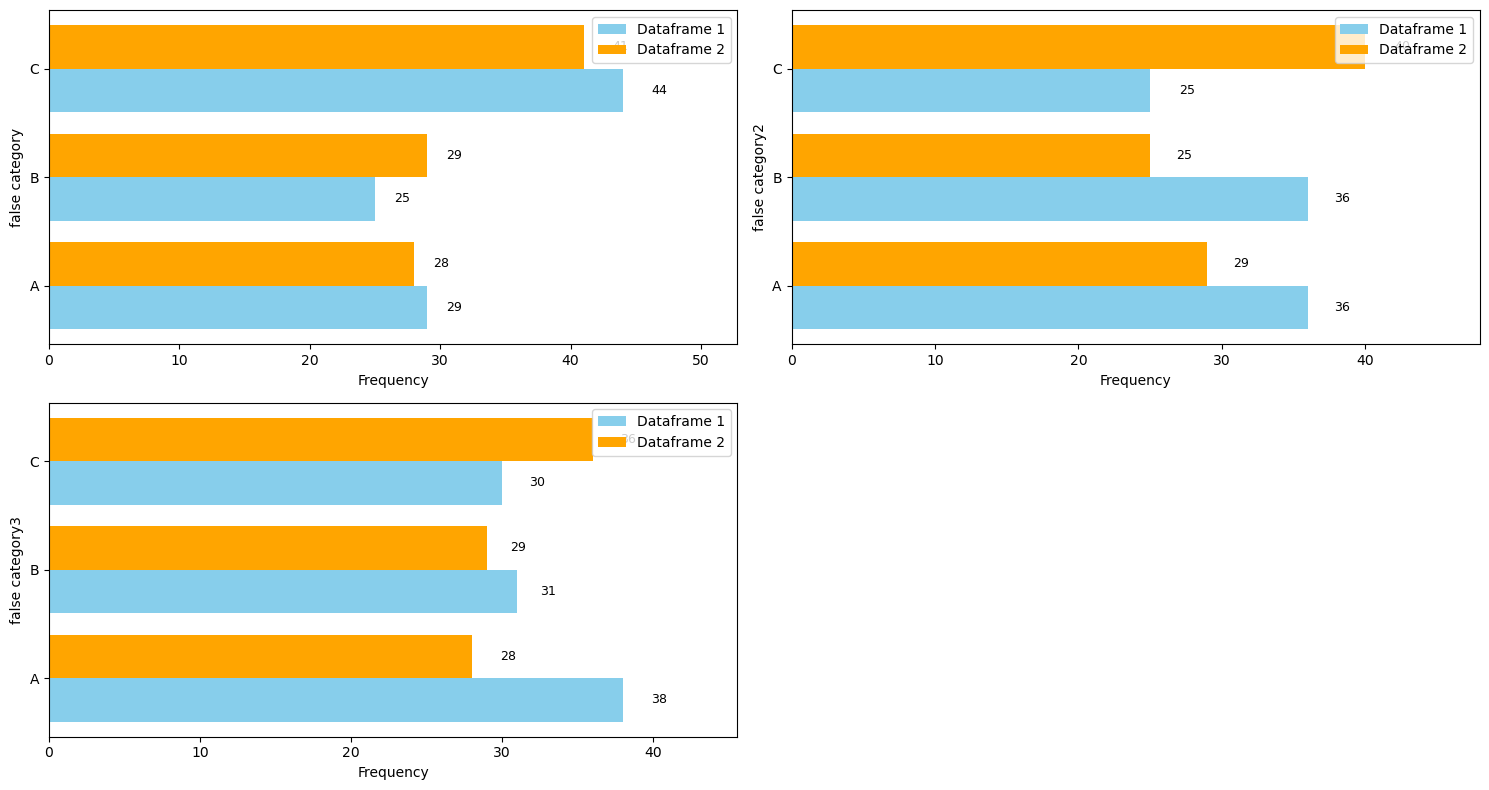

In [181]:
eda_categorical_variables_distributions(X_test, X_validation, 30, 33)


<section id="NumericDistributionsResults">
    <h3> 4.4. Numeric Variables Distributions </h3>
</section>


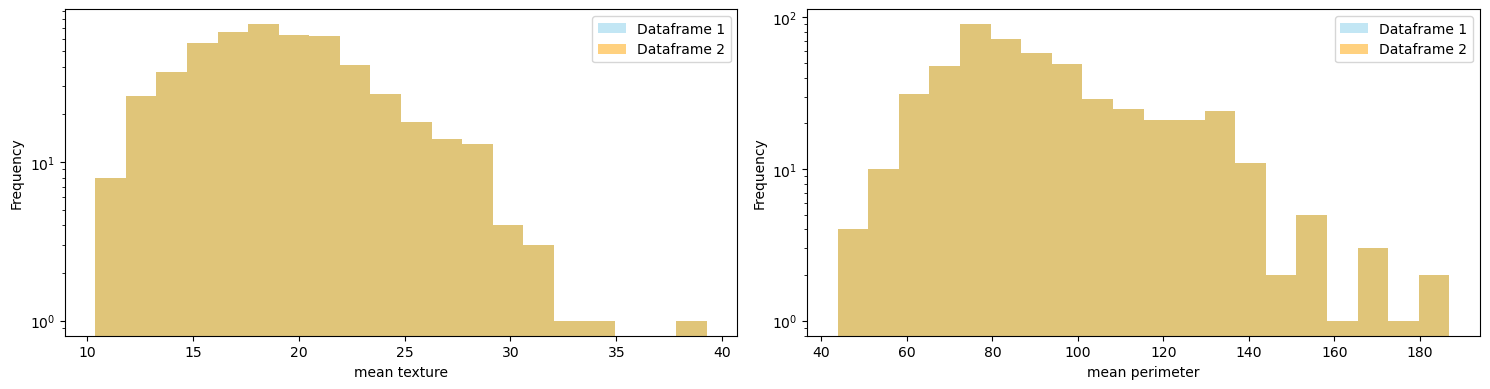

In [93]:
eda_numeric_variables_distributions(df_origin, df_origin, 1, 3)

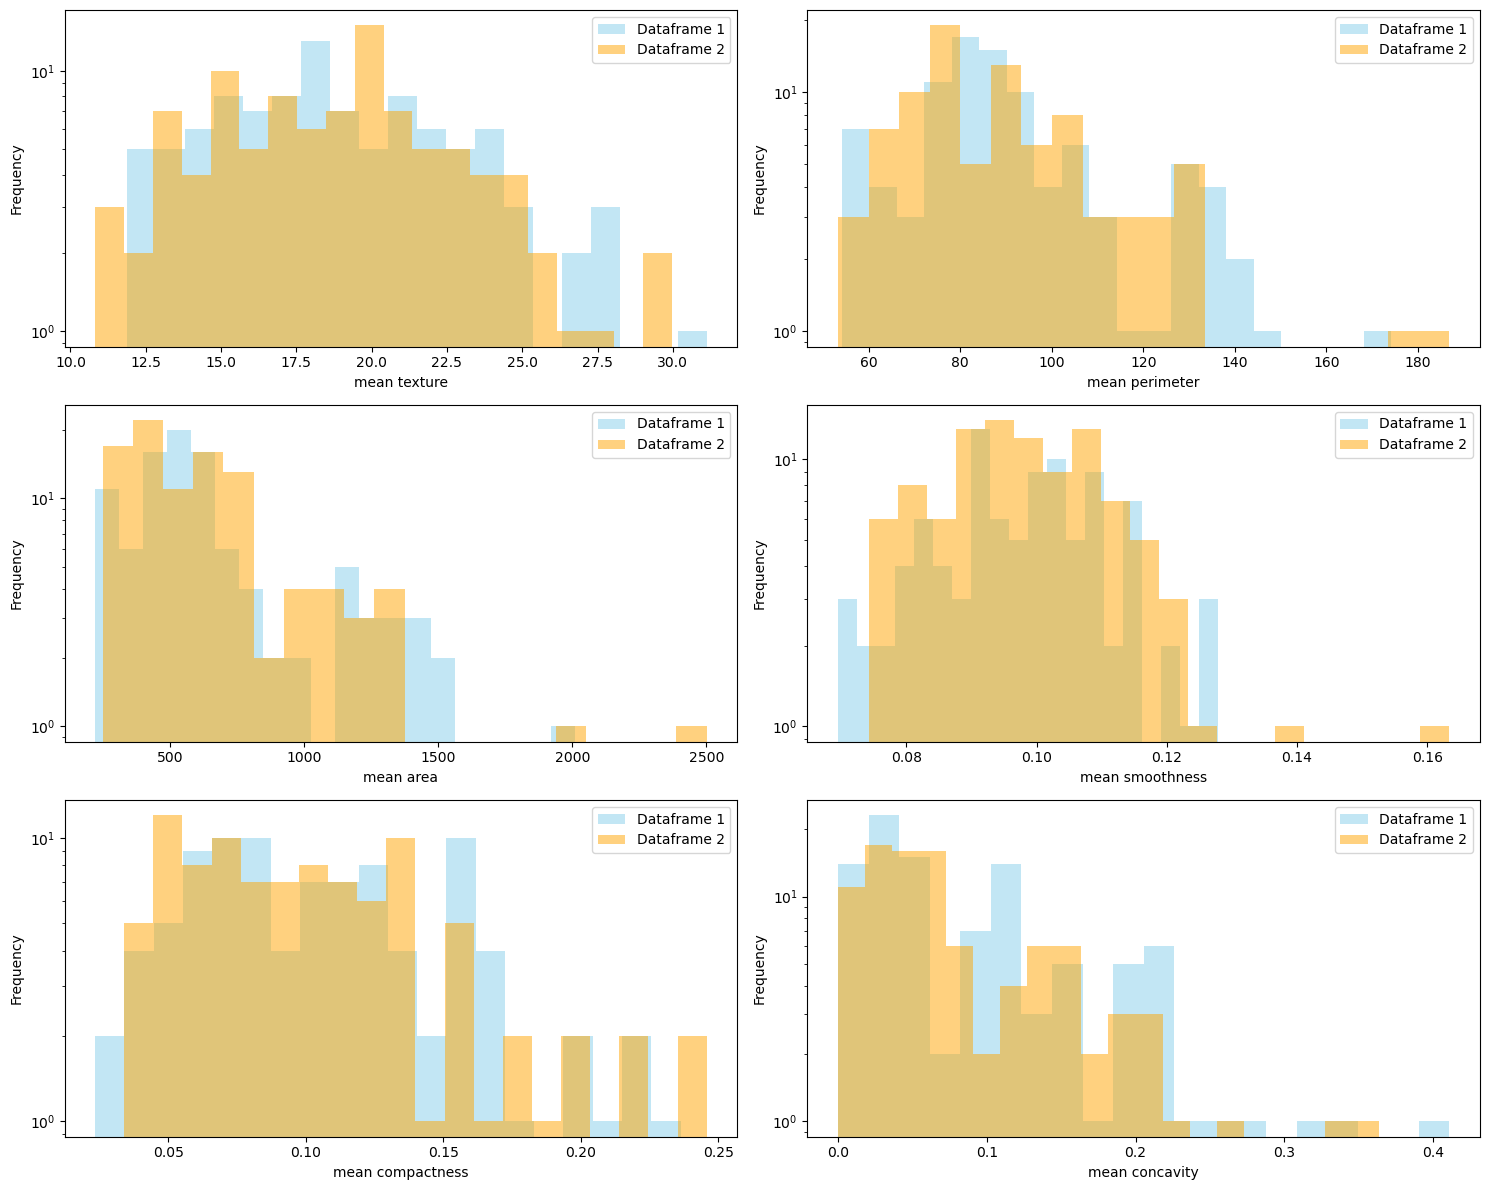

In [94]:
eda_numeric_variables_distributions(X_test, X_validation, 1, 7)


<section id="ProportionResults">
    <h3> 4.5. Target proportion </h3>
</section>


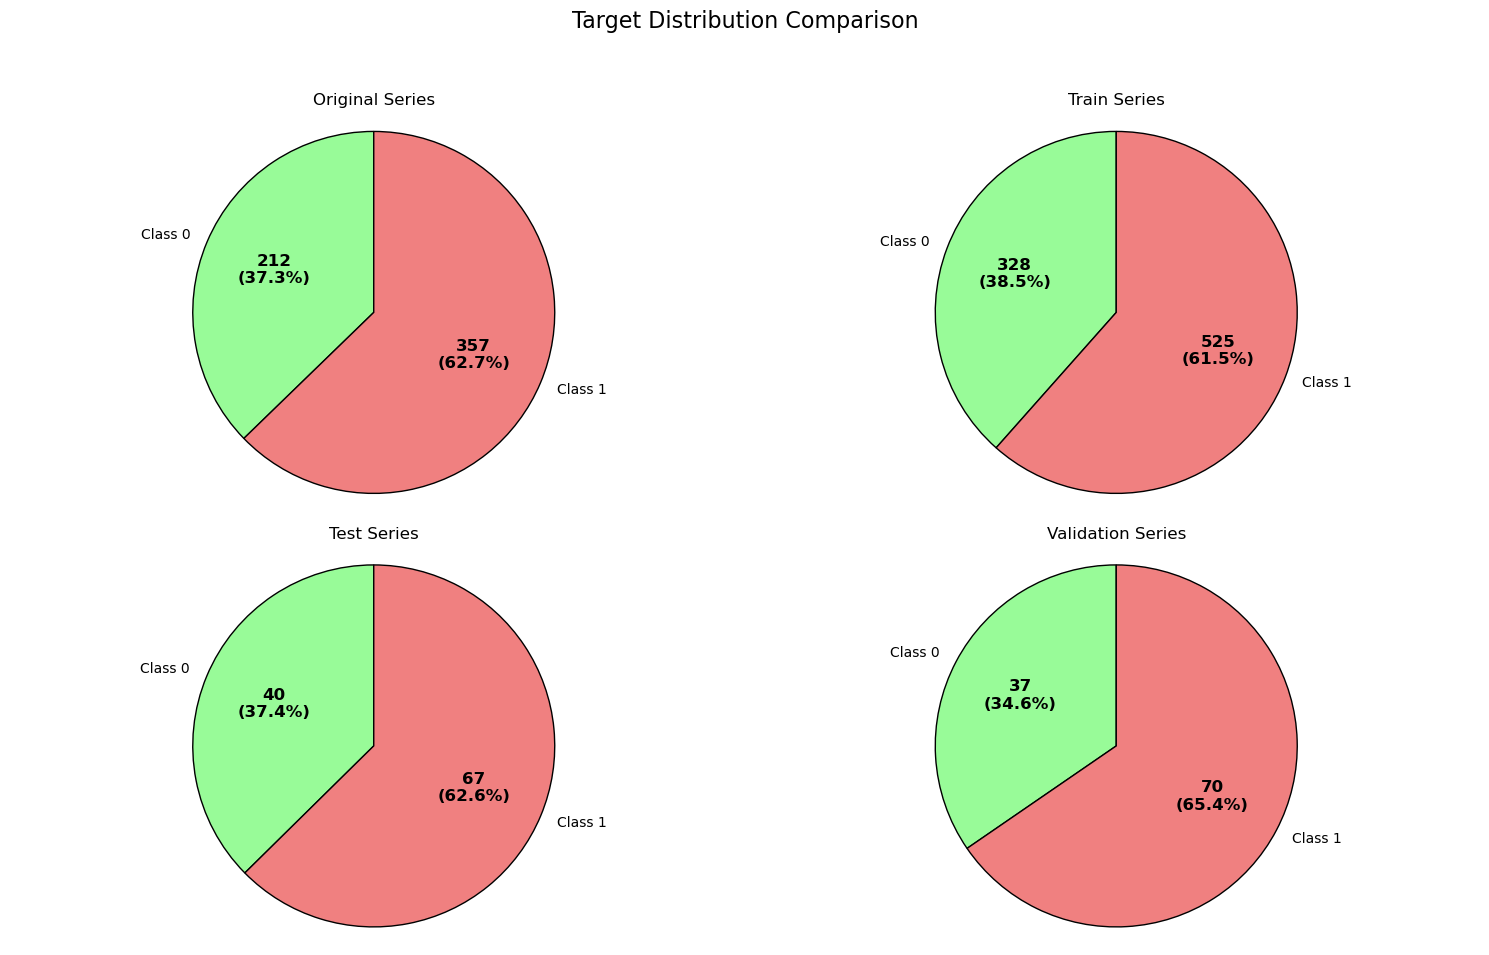

In [96]:
eda_target_distribution(y_origin, y_train, y_test, y_validation)


<section id="VariablesCorrelationResults">
    <h3> 4.6. Variables Correlation </h3>
</section>


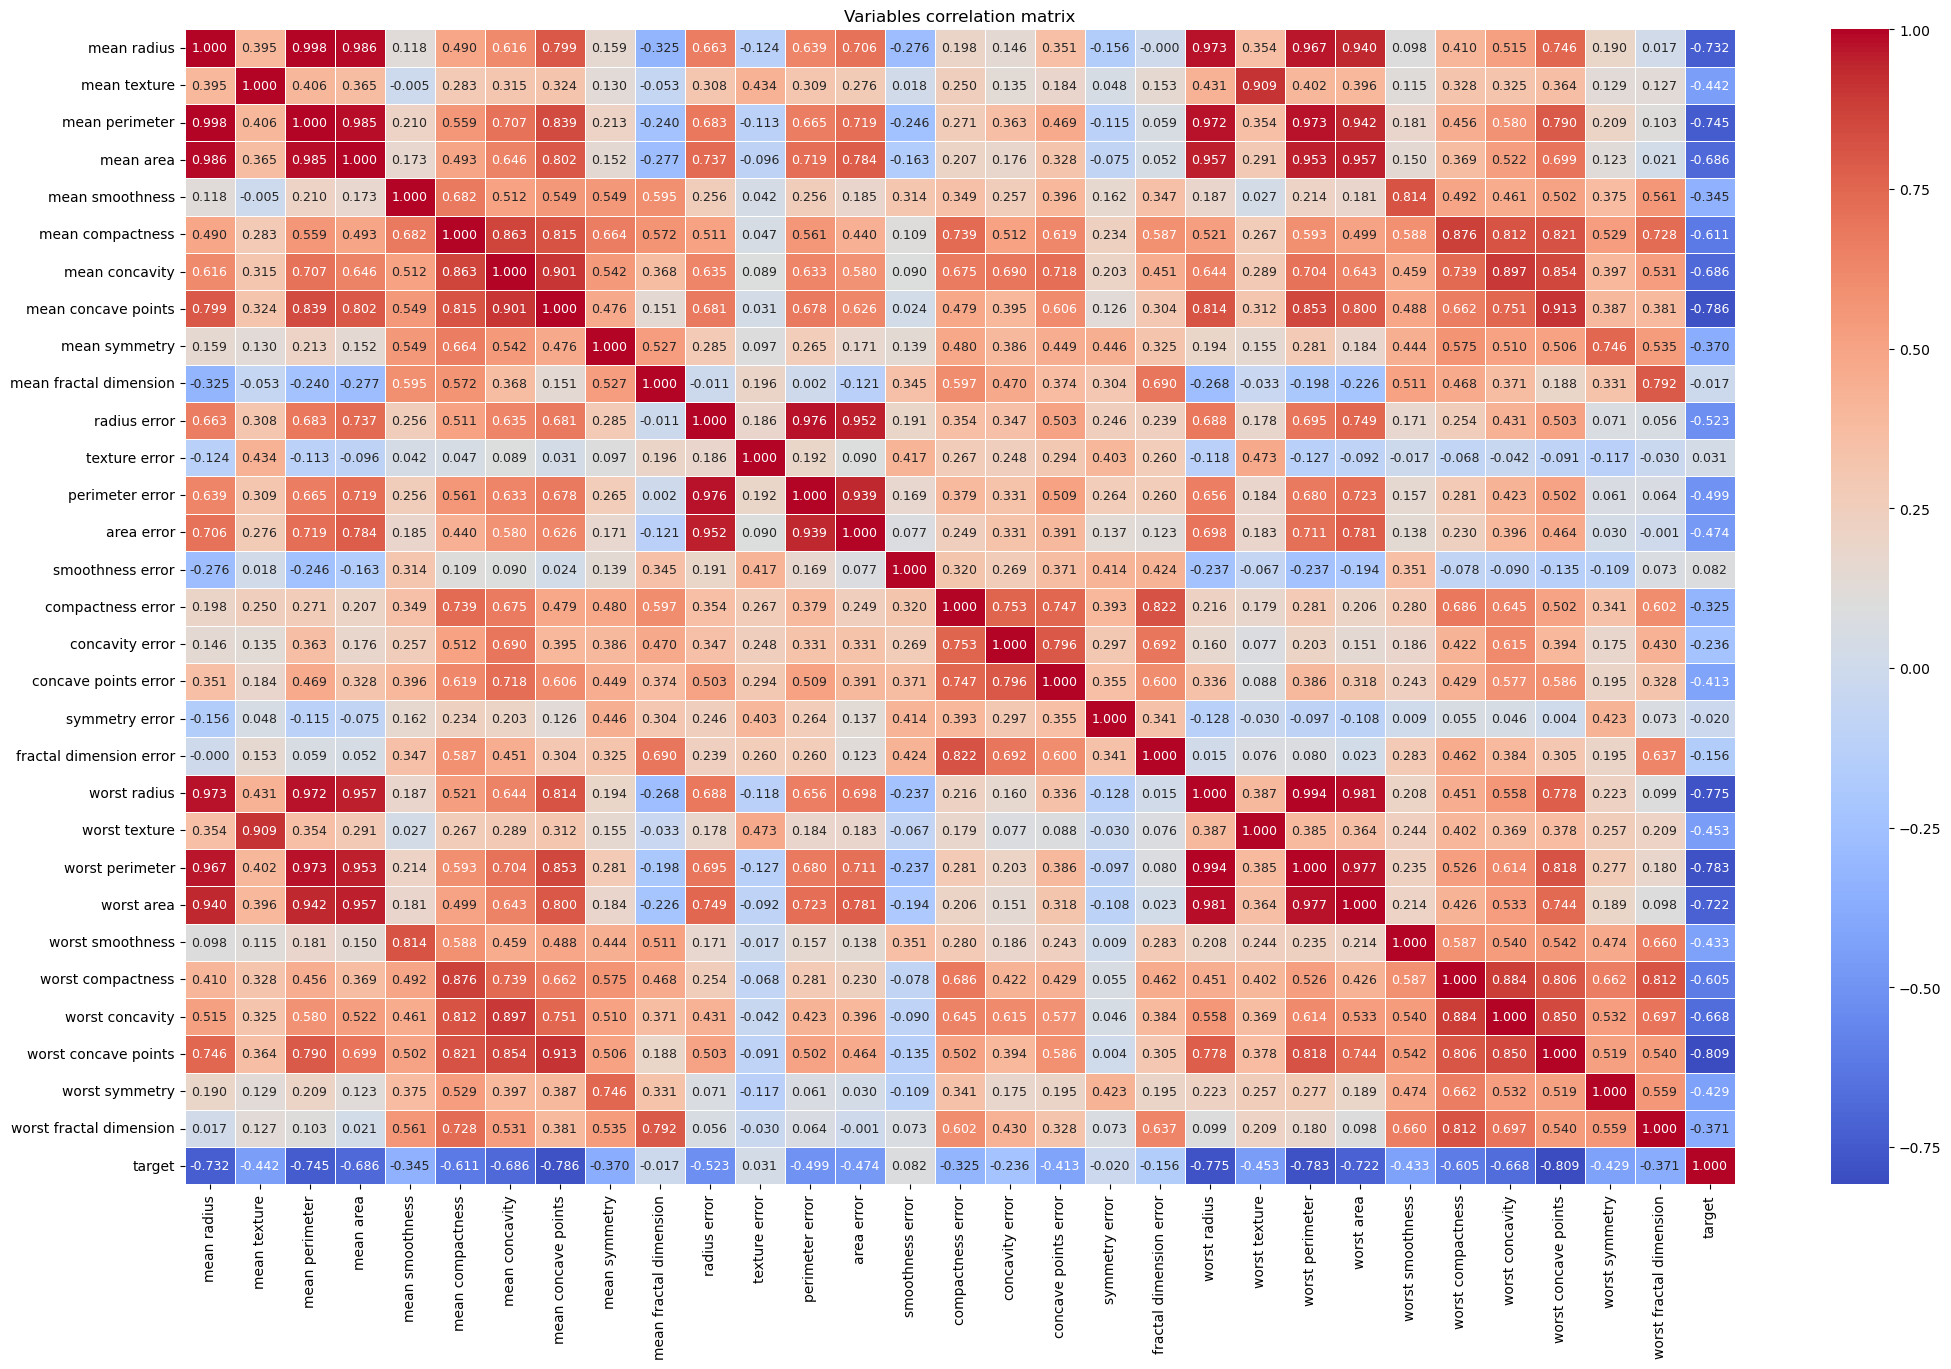

In [207]:
eda_variables_correlation(df_origin_missing_duplicate)